<a href="https://colab.research.google.com/github/ElyssonAlvs/Mineracao_de_Dados/blob/main/01_E0_Exercicio_Limpeza_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

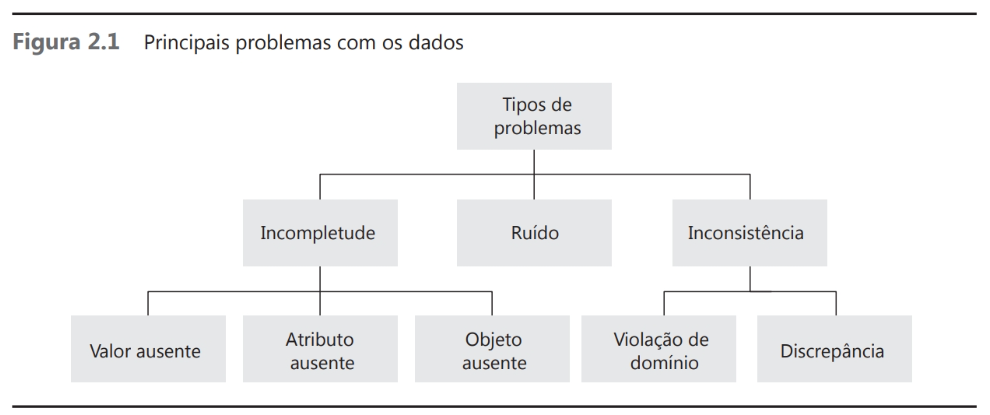

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes.


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso.

## Solução


### Carga do conjunto de dados `food_coded.csv`

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


## Primeiro contato
Identificar as primeiras linhas e informações gerais do dataset, afim de entender a sua estrutura.

In [ ]:
# Exibindo as informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_


## Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda), visando diminuir a incompletude no dataset, por ser um dado categórico, preencher com média ou mediana não faria sentido a moda é o valor mais frequente e, portanto, representa o que a maioria dos casos apresenta mantendo a coerência da coluna sem introduzir um valor arbitrário.

In [ ]:
display(df.loc[[63],'soup':])
df['soup'].fillna(df['soup'].mode()[0], inplace=True)
display(df.loc[[63],'soup':])


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180


<ipython-input-77-de49a68ad581>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['soup'].fillna(df['soup'].mode()[0], inplace=True)


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180



## Valores nulos

Uma das decisões que se pode tomar é descartar os valores nulos, mas claro levando em consideração qual pergunta deve-se responder, ou, caso o descarte vá danificar a análise futura, trocar os valores nulos por moda, média ou mediana ou um valor padrão dependendo da natureza da coluna, como feito no exemplo anterior.

No código a seguir, verifica-se a quantidad de valores nulos em porcentagem em cada coluna.

In [ ]:
# Verificando a quantidade de valores nulos por coluna
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_data[missing_percentage > 0]
missing_data

,0
GPA,2
Gender,0
breakfast,0
calories_chicken,0
calories_day,19
...,...
type_sports,26
veggies_day,0
vitamins,0
waffle_calories,0


Como identificado os valores nulos, uma alternativa foi trocar os valores nulos das colunas numéricas por média e para as colunas categóricas, por moda.

In [ ]:
# Preenchendo valores nulos com a média para colunas numéricas
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Preenchendo valores nulos com a moda para colunas categóricas
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


<ipython-input-79-7742b9984cb3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-79-7742b9984cb3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Ruídos
No dataset é encontrado valores atípicos e inconsistentes, uma alternativa é plotar os outliers para se ter uma melhor noção de como os dados estão distibuidos. Para isso, a biblioteca **[Matplot](https://matplotlib.org/)** fui utilizada.

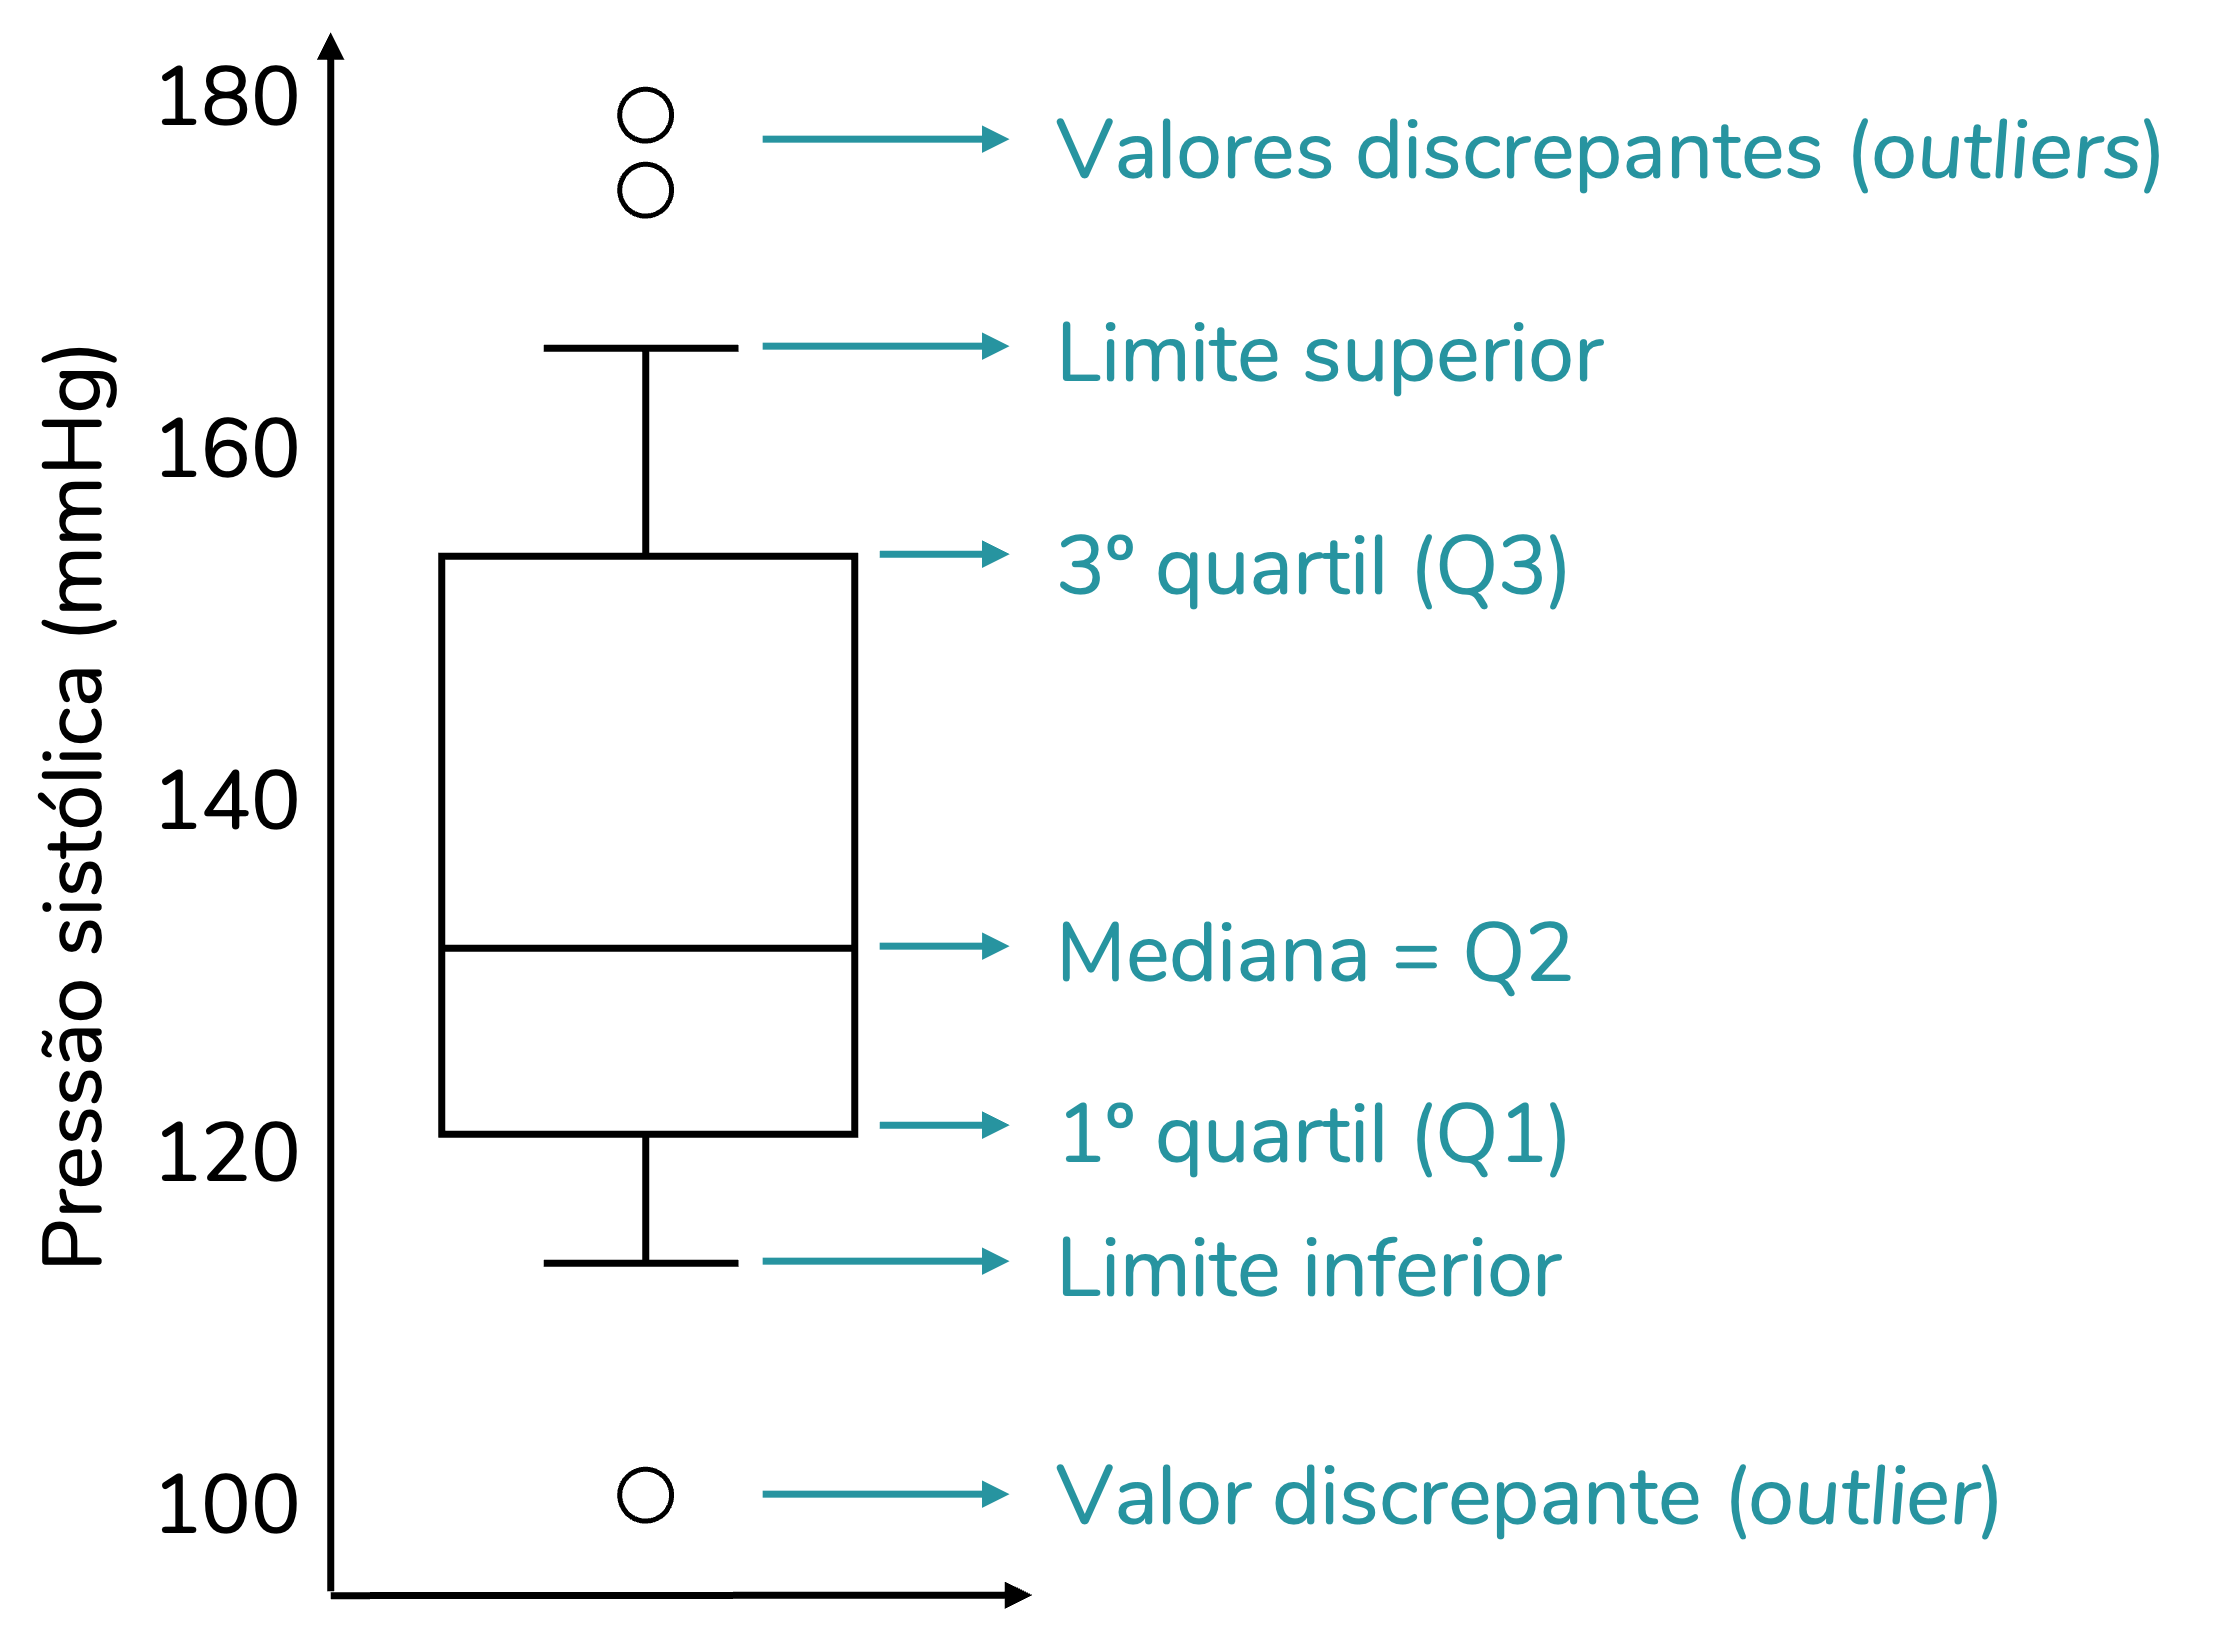

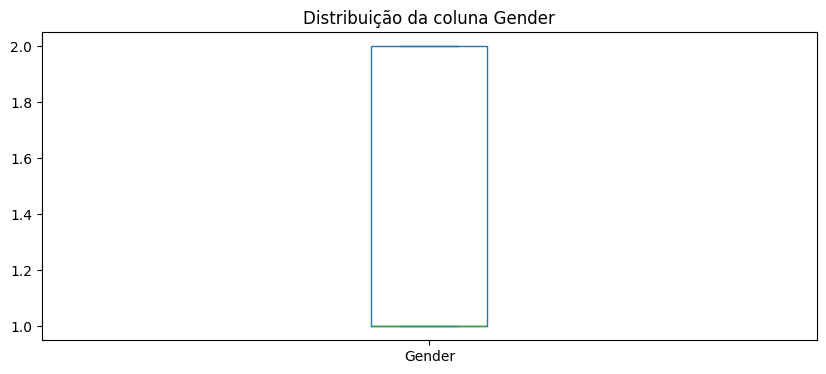

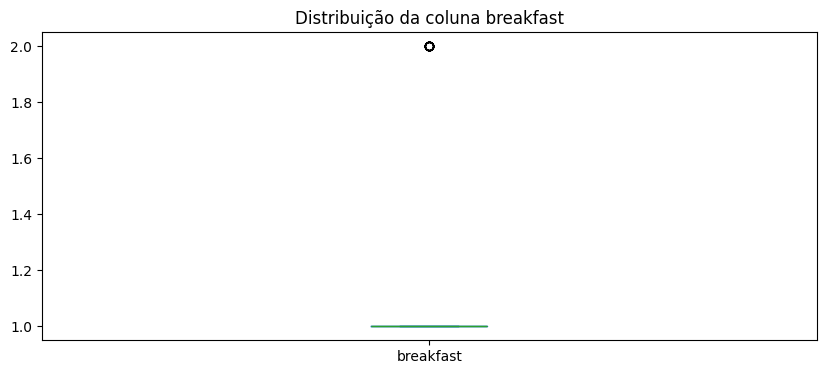

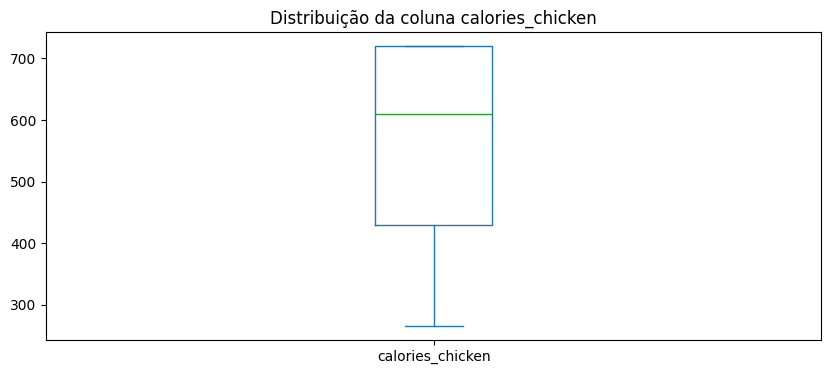

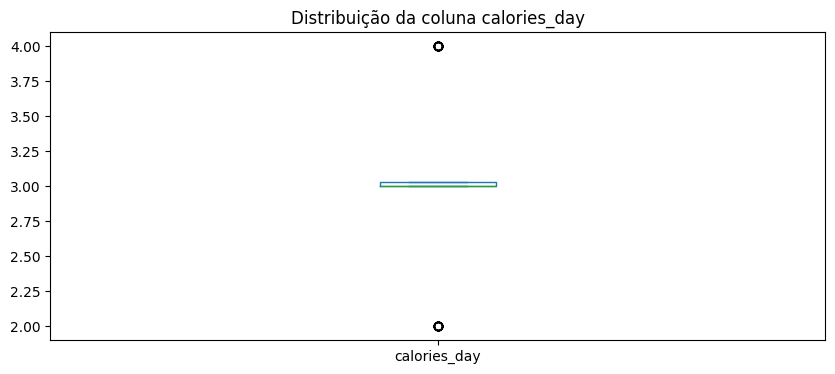

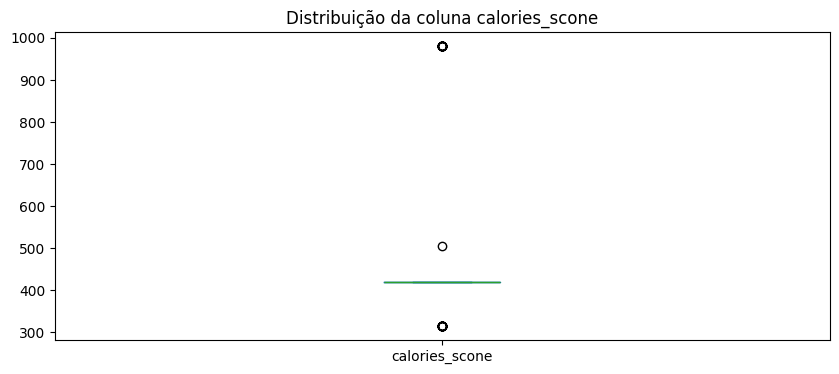

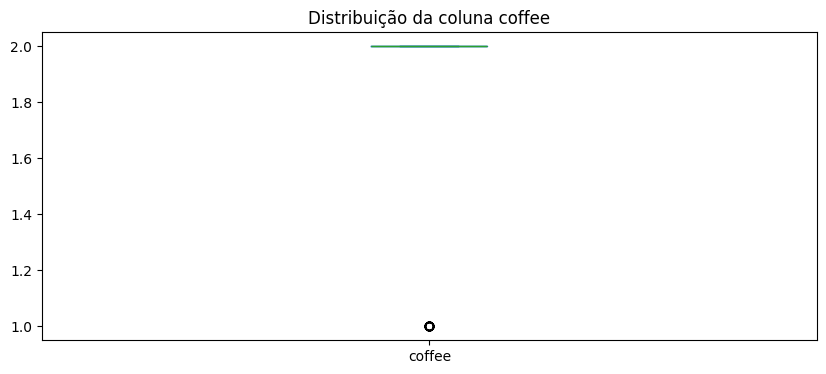

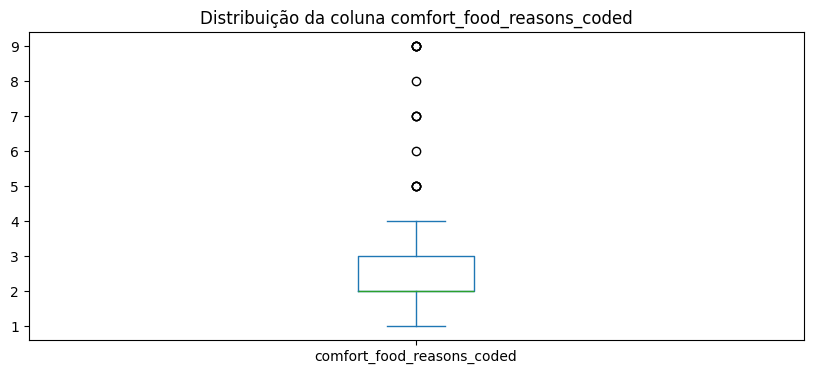

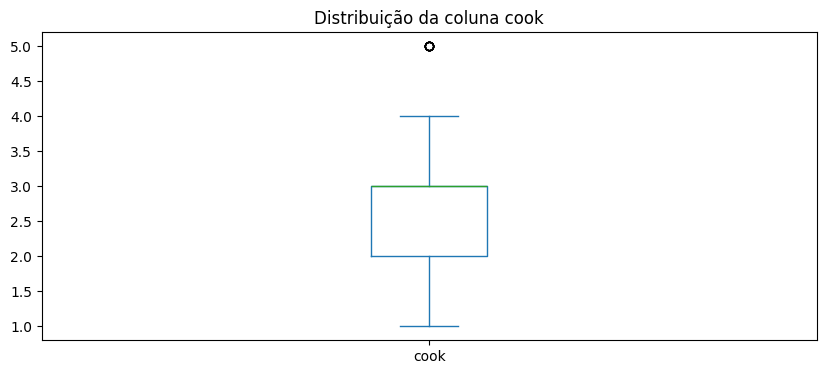

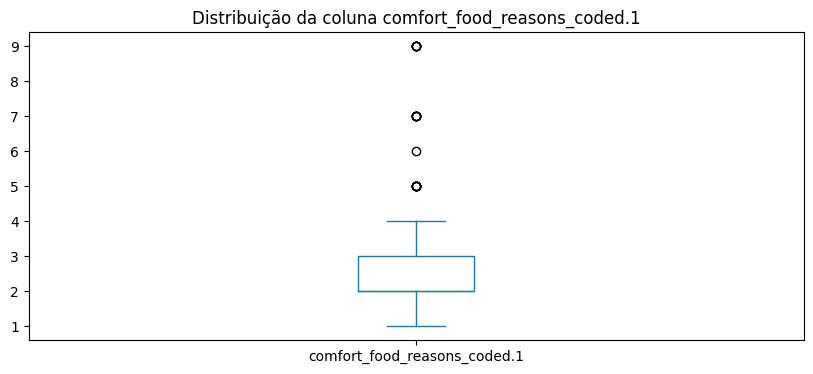

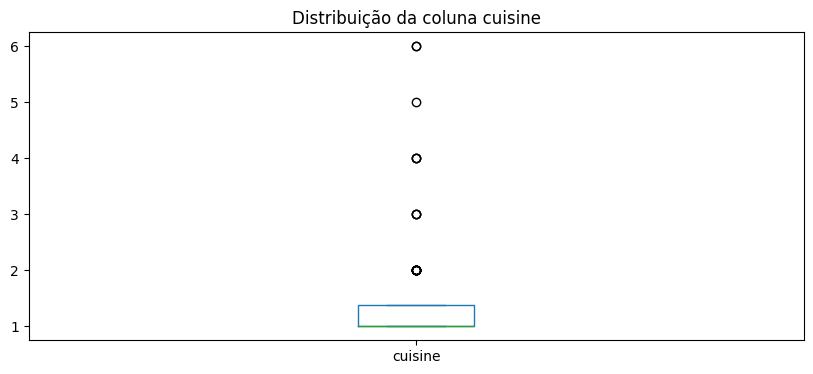

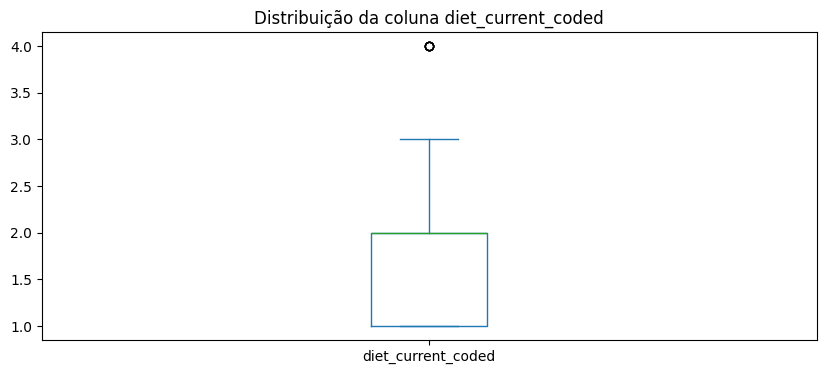

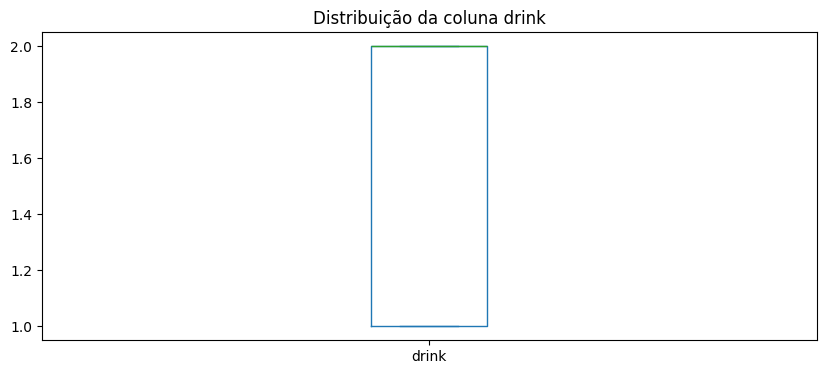

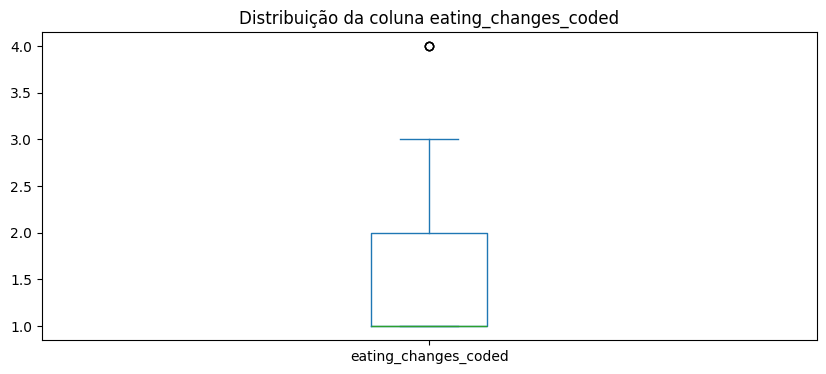

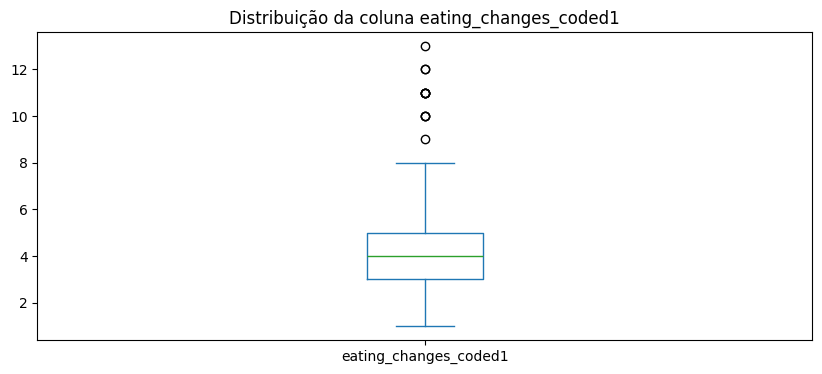

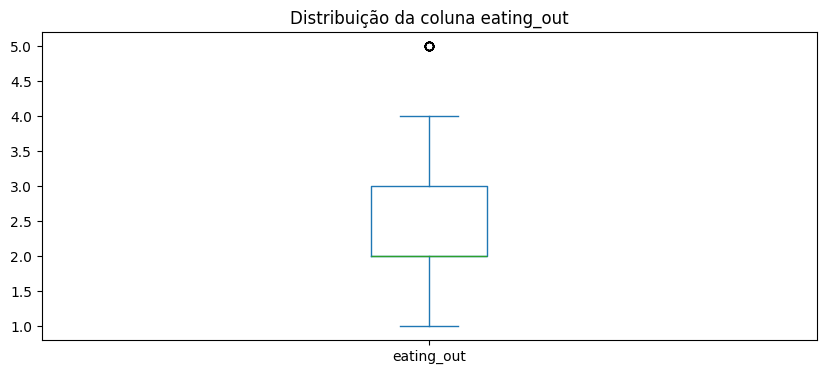

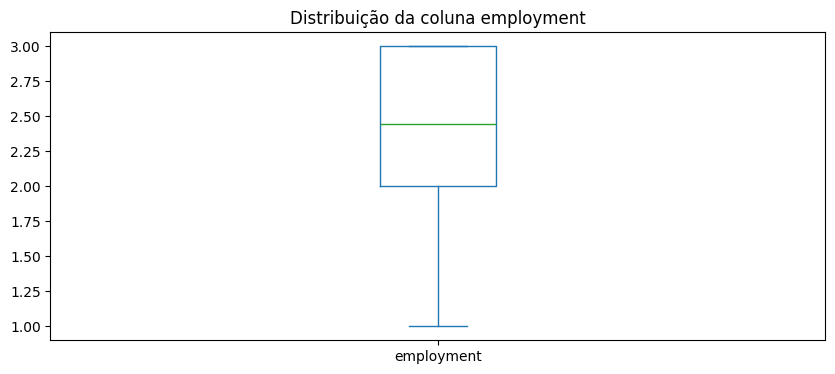

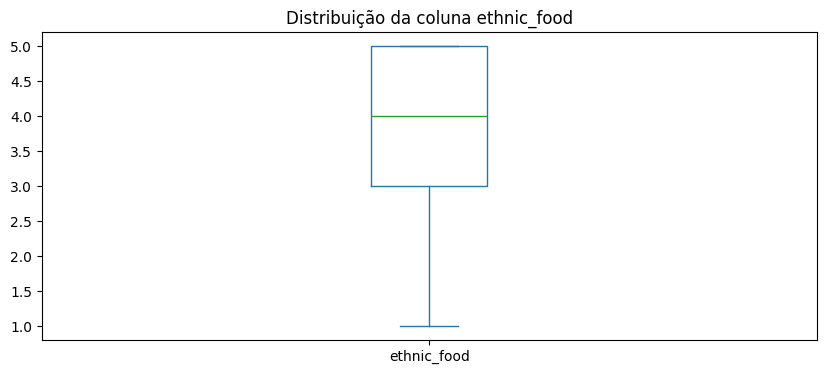

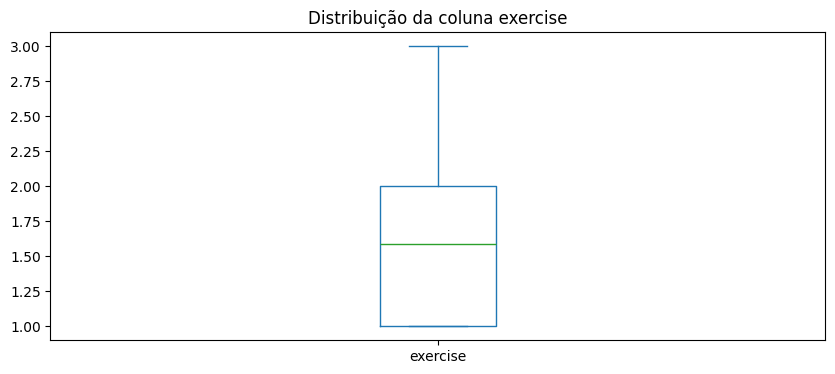

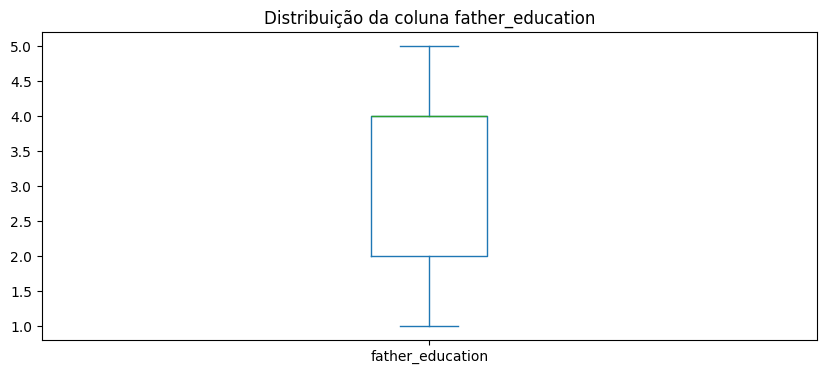

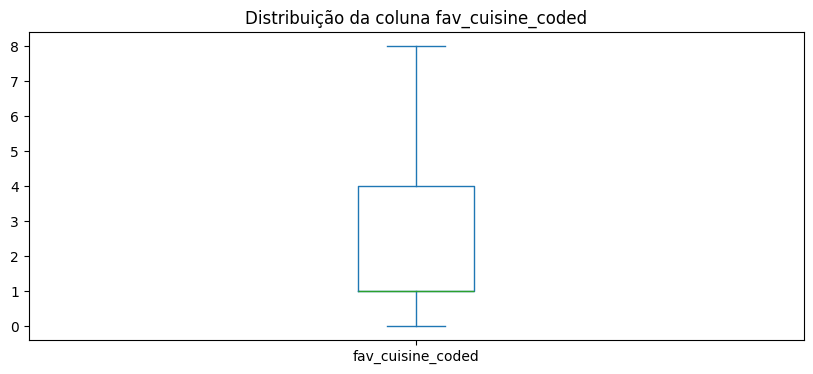

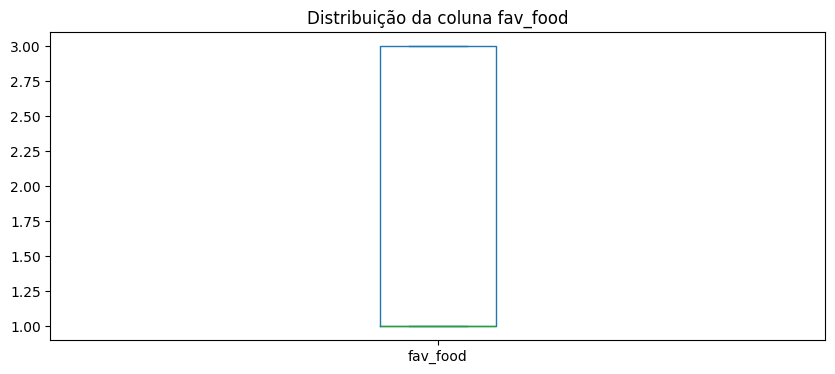

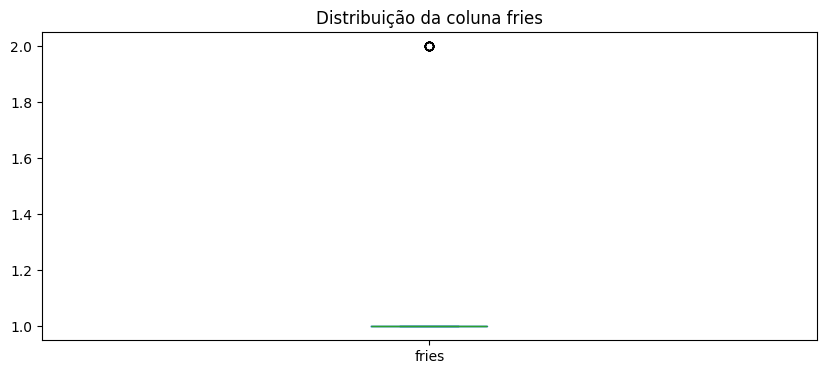

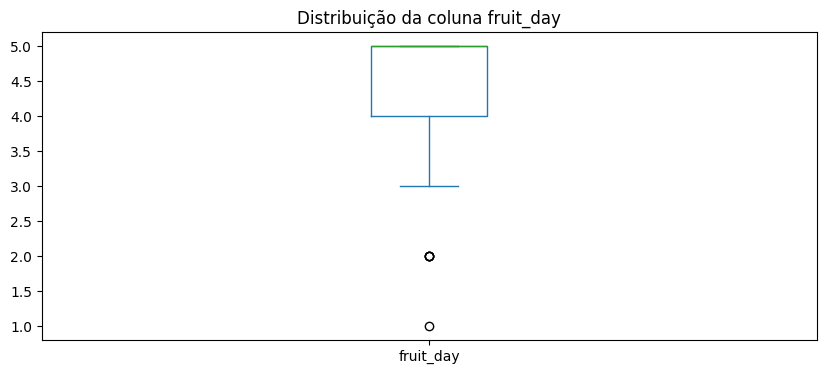

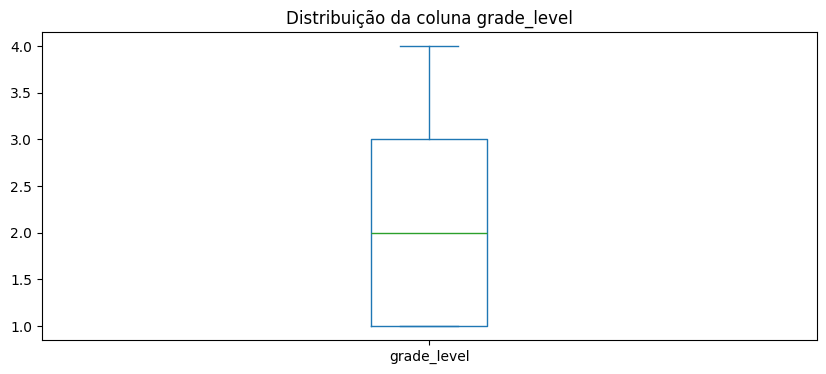

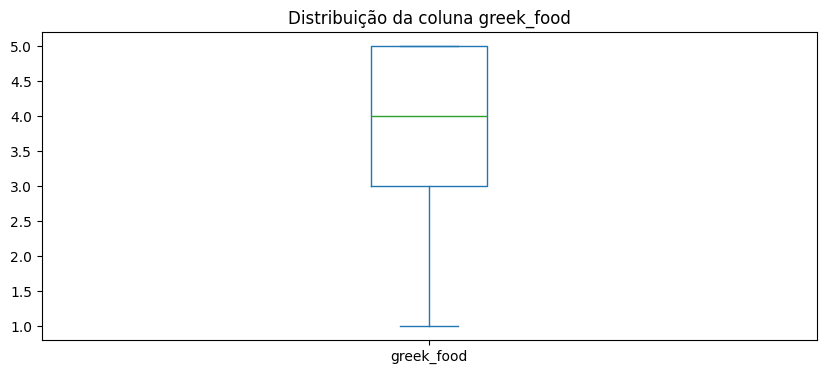

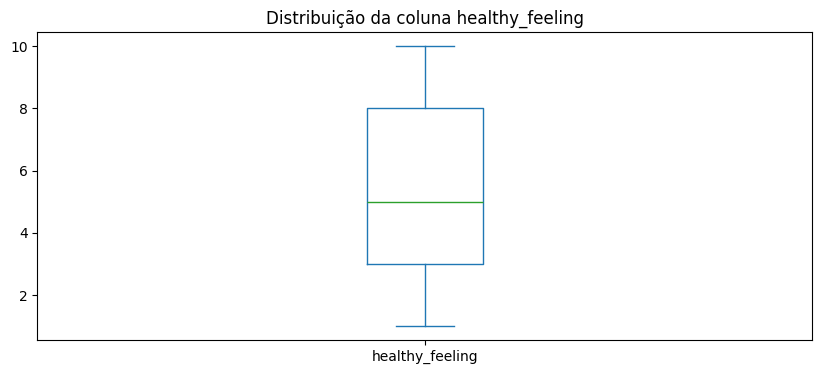

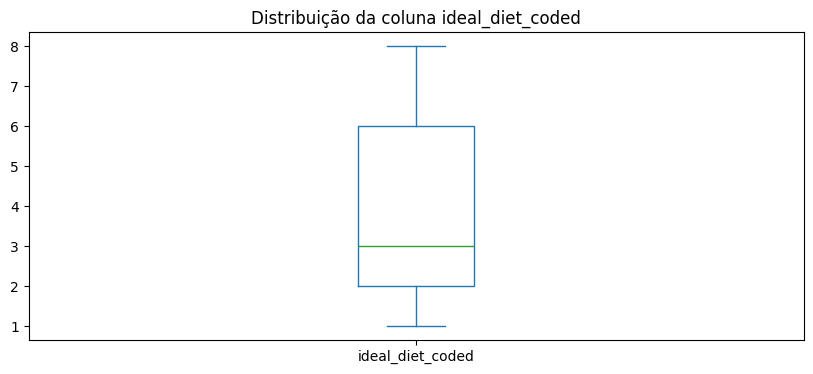

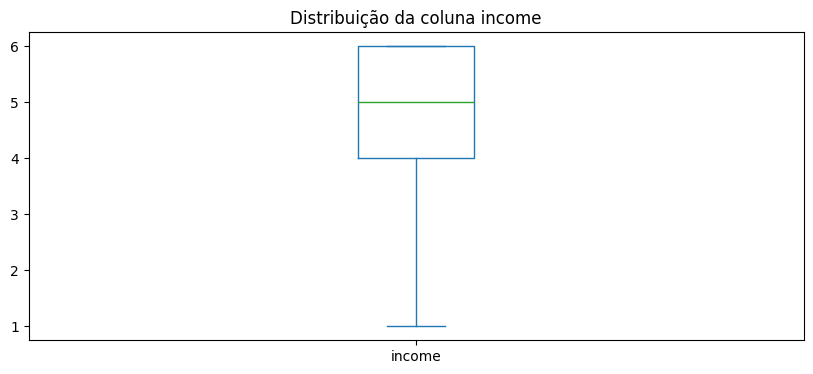

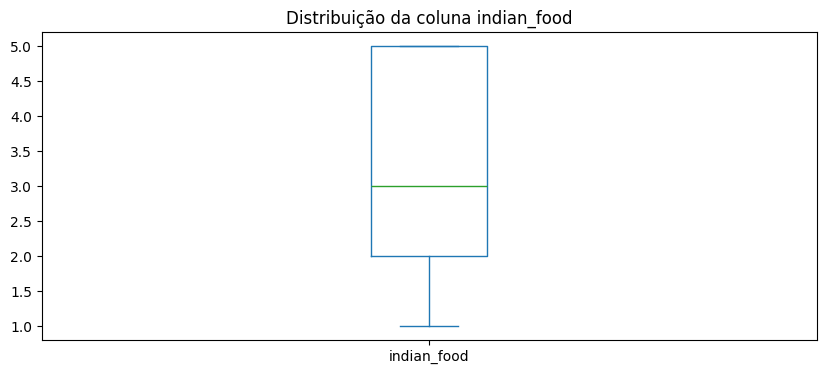

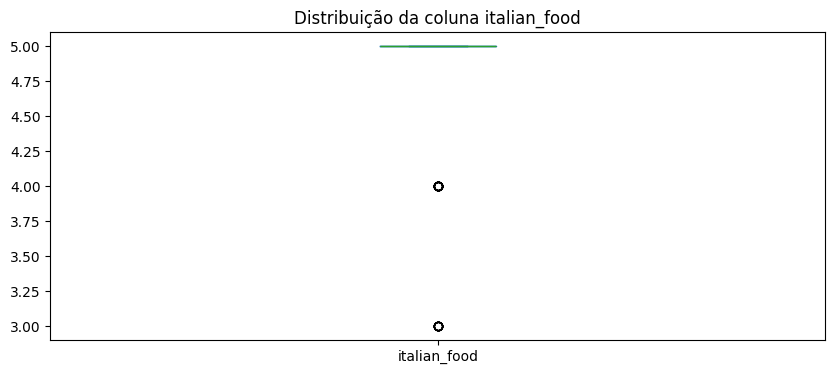

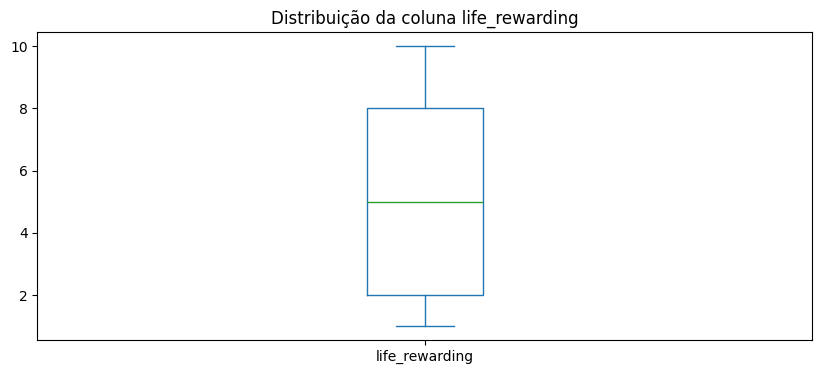

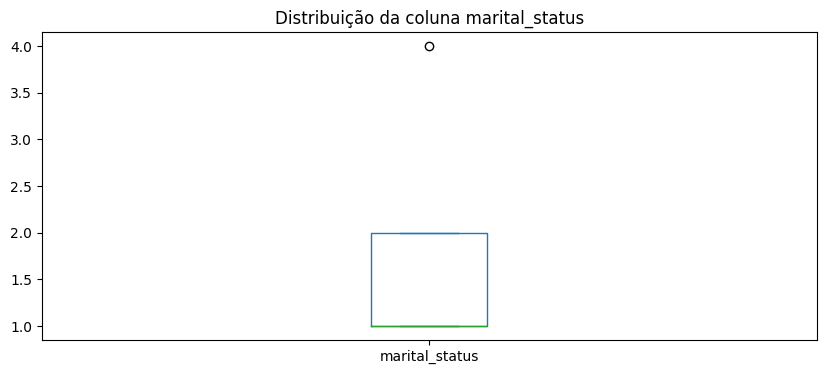

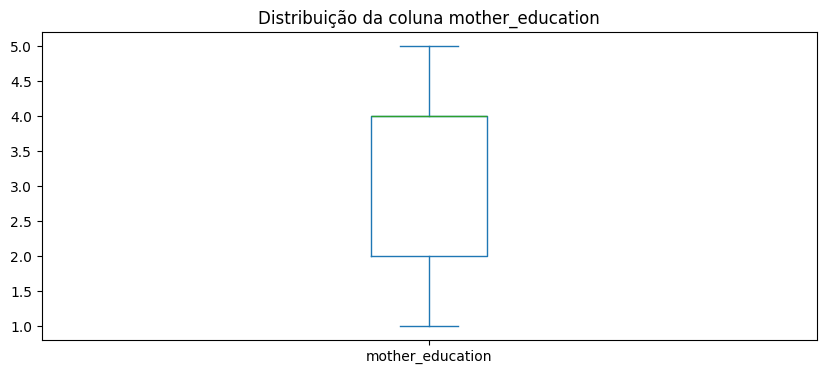

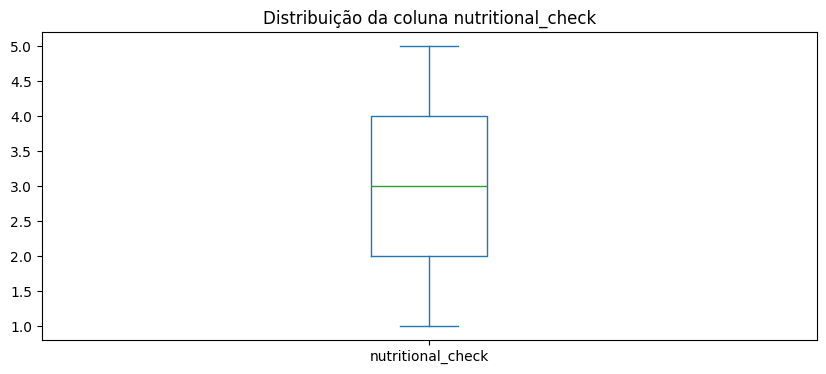

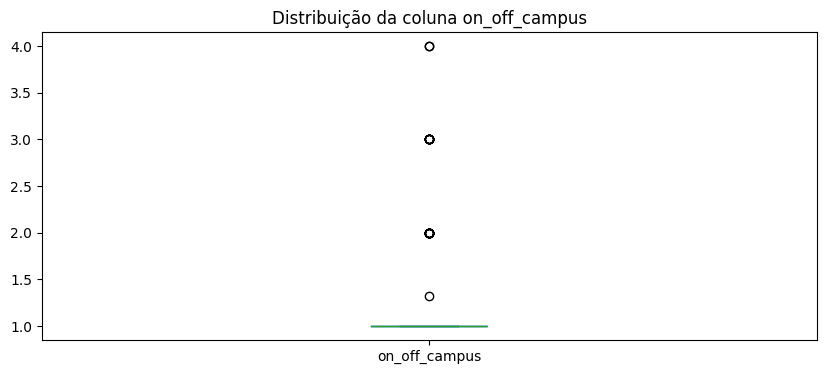

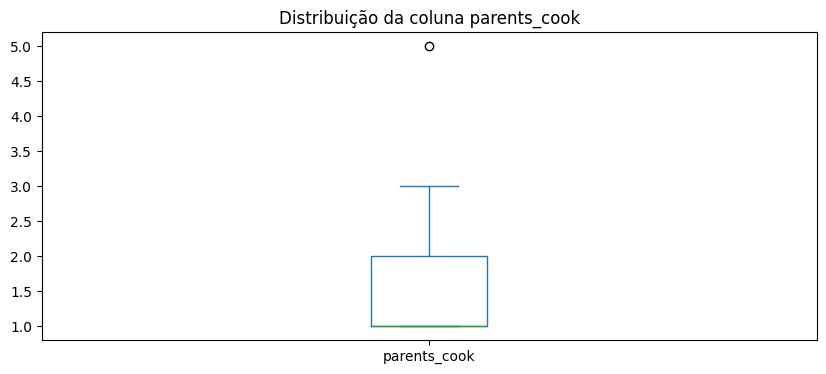

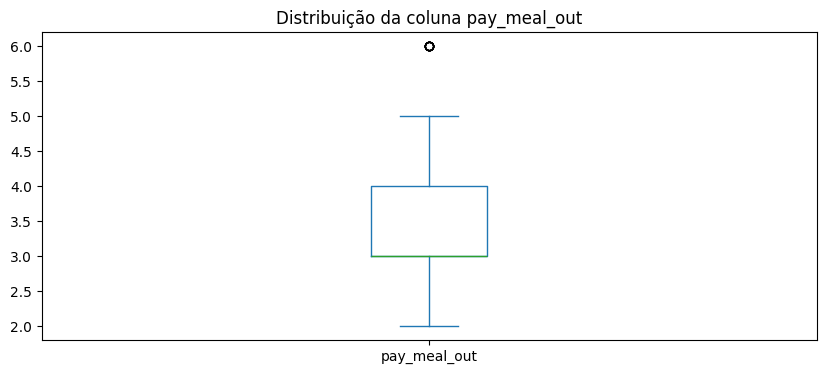

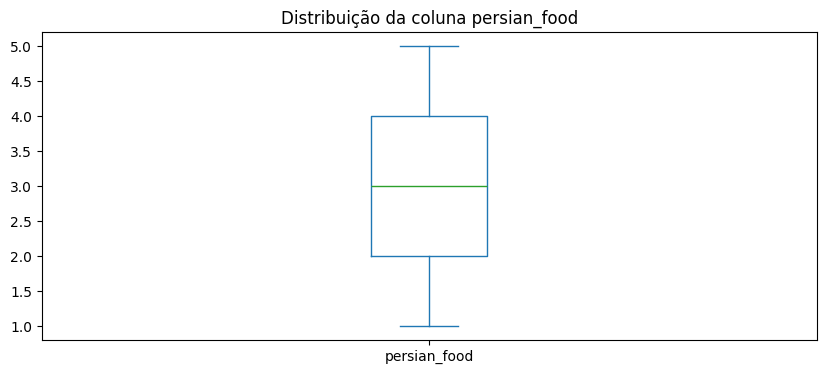

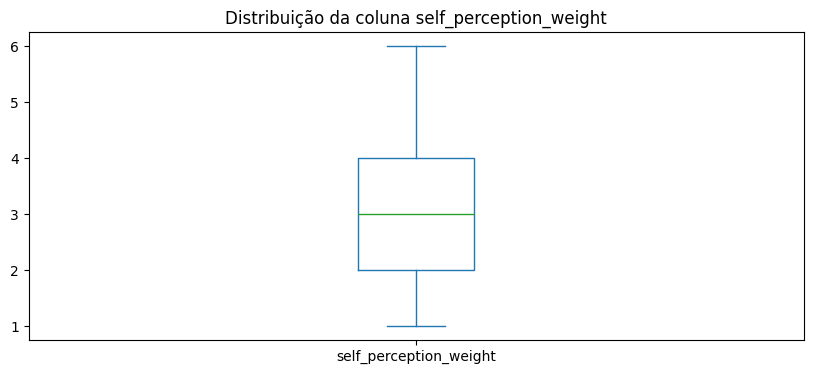

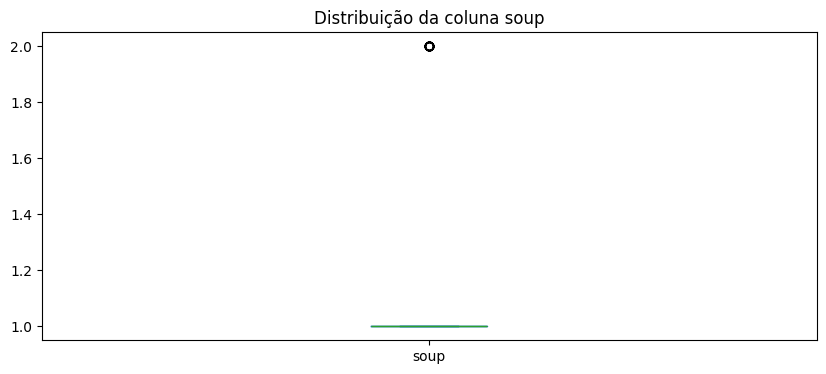

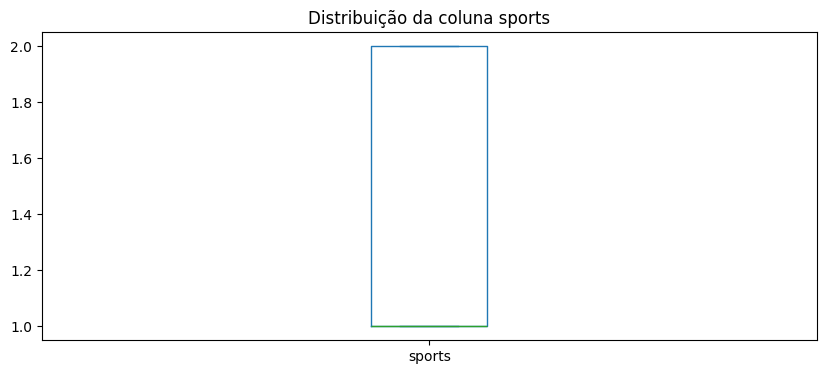

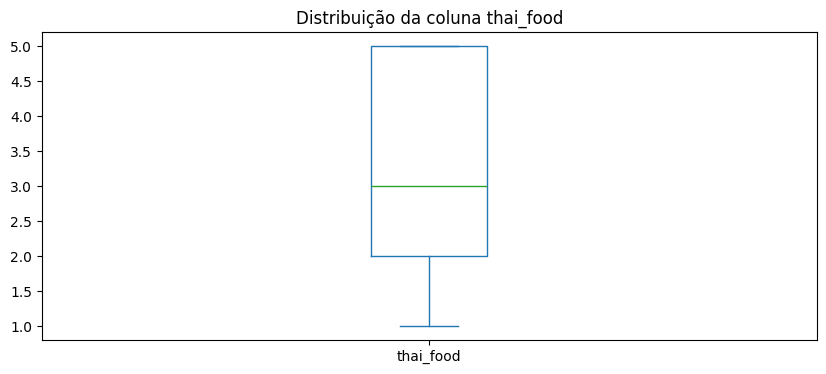

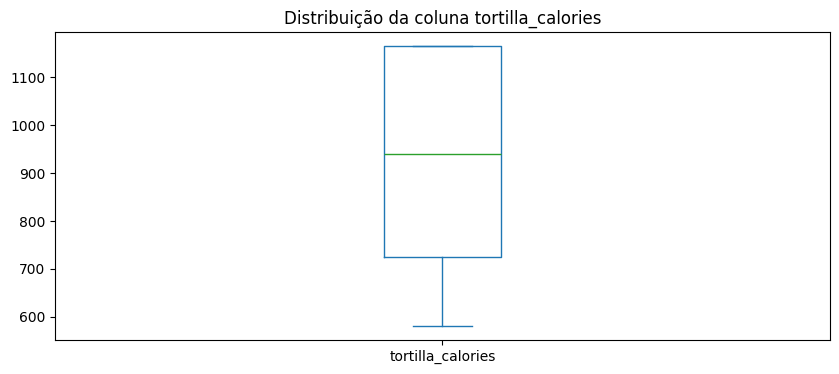

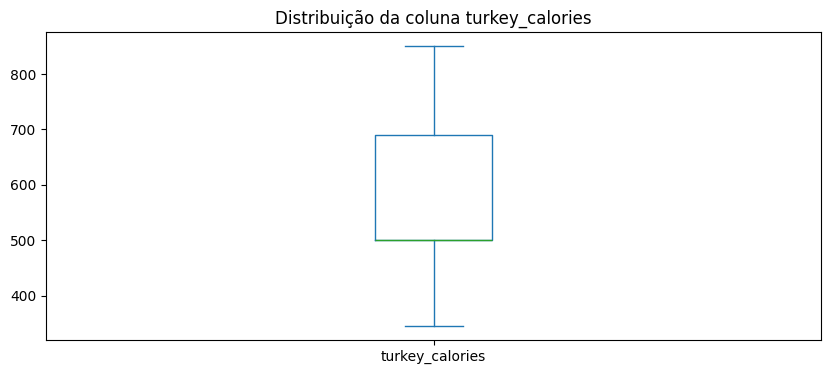

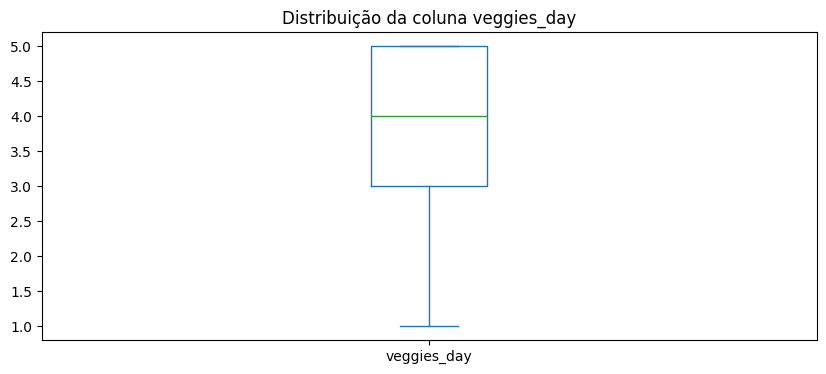

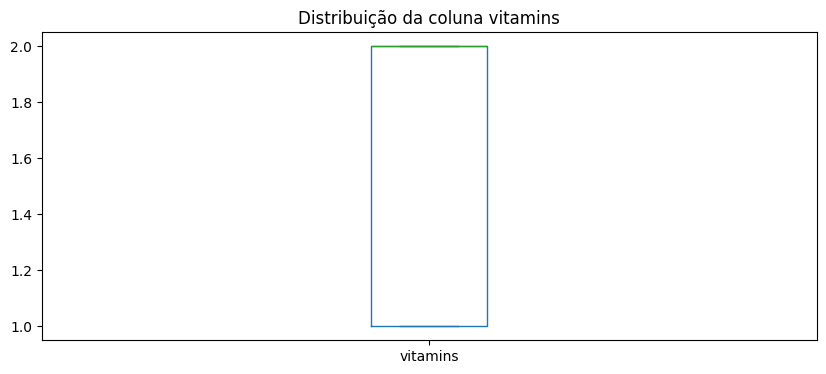

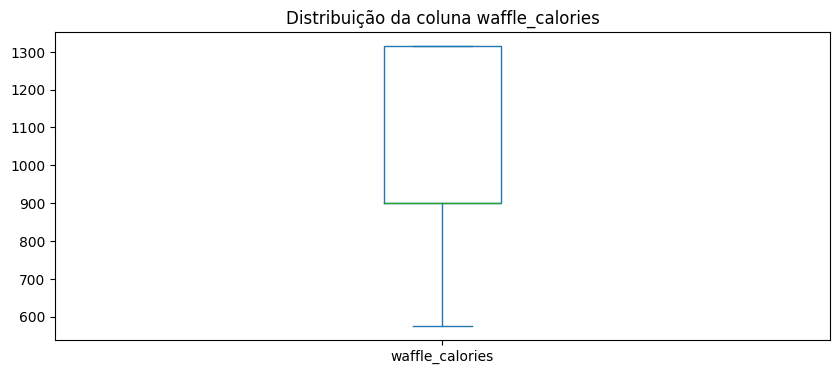

In [ ]:
import matplotlib.pyplot as plt

# Visualizando distribuições para detectar outliers em colunas numéricas
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    df[column].plot(kind='box', title=f'Distribuição da coluna {column}')
    plt.show()


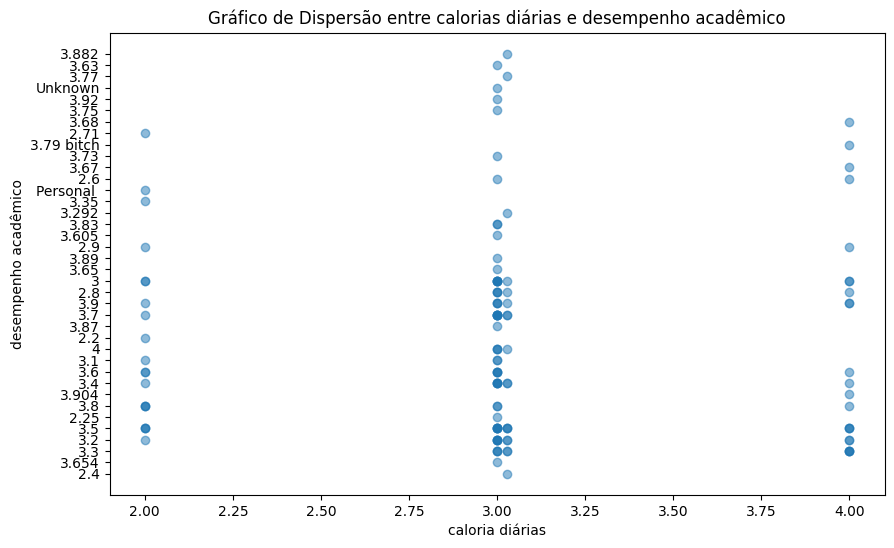

In [ ]:
# Um exemplo é relacioar as caloria diárias com o desempenho acadêmico, por meio do gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df['calories_day'], df['GPA'], alpha=0.5)
plt.title('Gráfico de Dispersão entre calorias diárias e desempenho acadêmico')
plt.xlabel('caloria diárias')
plt.ylabel('desempenho acadêmico')
plt.show()


Percebe-se que o gráfico fica difícil de entender, visto que o **GPA** parece ter valores categóricos, que são ruídos, Isso ocorre porque o **GPA** deve ser representado apenas por valores numéricos, convertendo calores não numéricos para *NaN* e em seguida substituí-los pela média ou mediana do **GPA** ou descartar

A distribuição das calorias diárias para concentrada entra valores específicos, um falta de variação ou ruído visual, que poder indicar respostas reptitivas ou falta de precisão, nesse cenário, verificar para ver a necessidade de normalizar ou padronizar esses valores.

In [ ]:
# Substituir valores não numéricos por NaN na coluna GPA
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')

# Exibir valores únicos na coluna 'GPA' após a conversão
print(df['GPA'].unique())

# Substituir NaN pela média ou mediana do GPA
df['GPA'].fillna(df['GPA'].mean(), inplace=True)

[2.4   3.654 3.3   3.2   3.5   2.25  3.8   3.904 3.4   3.6   3.1   4.
 2.2   3.87  3.7   3.9   2.8   3.    3.65  3.89  2.9   3.605 3.83  3.292
 3.35    nan 2.6   3.67  3.73  2.71  3.68  3.75  3.92  3.77  3.63  3.882]


<ipython-input-82-1347a2ac2956>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(df['GPA'].mean(), inplace=True)


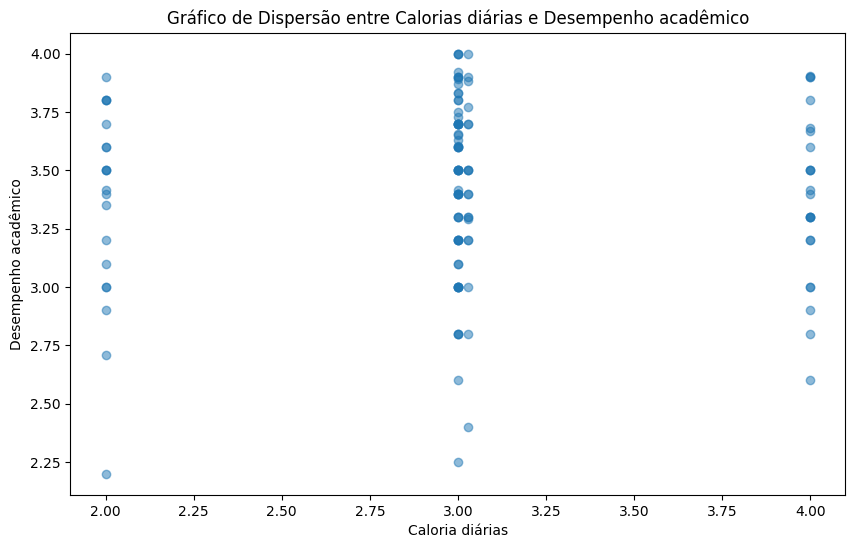

In [ ]:
# Gerando o gráfico novamente
plt.figure(figsize=(10, 6))
plt.scatter(df['calories_day'], df['GPA'], alpha=0.5)
plt.title('Gráfico de Dispersão entre Calorias diárias e Desempenho acadêmico')
plt.xlabel('Caloria diárias')
plt.ylabel('Desempenho acadêmico')
plt.show()

percebe-se outliers visuais e valores específicos nas calorias diárias, sendo gráfico se tornado "menos carregado", em relação ao anterior.

## Inconsitência
 Outras mudança específica que pode-se fazer as colunas fora de padronização, com valores fora de padrão:

In [ ]:
# Arredondar valores das colunas para 1 casa decimal
df['cuisine'] = df['cuisine'].round(1)
df['GPA'] = df['GPA'].round(1)
df['calories_day'] = df['calories_day'].round(1)
df['drink'] = df['drink'].round(1)
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].round(1)
df['sports'] = df['sports'].round(1)
display(df)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.7,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,none,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,2.7,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3.0,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,2.7,...,1.0,1.4,4,940.0,500,basketball,5,2,1315,180
122,3.9,1,1,720,3.0,420.0,1,"rice, potato, seaweed soup",sadness,2.7,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3.0,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",2.7,...,2.0,2.0,1,940.0,500,none,3,1,1315,135


# Perguntas
Datasets respondem perguntas, exemplo :

* Quais são os tipos de alimentos mais consumidos?






Modificando as colunas dos alimentos para em casos 1 ser "Sim' e 2 ser "Não" temos:


In [ ]:
df['breakfast'] = df['breakfast'].replace({1: 'Sim', 2: 'Não'})
df['coffee'] = df['coffee'].replace({1: 'Sim', 2: 'Não'})
df['soup'] = df['soup'].replace({1: 'Sim', 2: 'Não'})
df['fries'] = df['fries'].replace({1: 'Sim', 2: 'Não'})

In [ ]:
# Selecionar colunas relacionadas ao consumo alimentar
alimento_cols = ['breakfast', 'coffee', 'fruit_day', 'healthy_meal', 'soup', 'fries']

# Preencher valores nulos e padronizar texto
for col in alimento_cols:
    # Verificar se a coluna contém valores nulos e preencher com a moda
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

        # Verificar se todos os valores da coluna são strings antes de aplicar .str
        if all(isinstance(val, str) for val in df[col].dropna()):
            df[col] = df[col].str.lower().str.strip()

# Contagem dos valores em cada coluna
for col in alimento_cols:
    print(f"\nContagem para {col}:\n", df[col].value_counts())



Contagem para breakfast:
 breakfast
sim    111
não     14
Name: count, dtype: int64

Contagem para coffee:
 coffee
não    94
sim    31
Name: count, dtype: int64

Contagem para fruit_day:
 fruit_day
5    63
4    33
3    24
2     4
1     1
Name: count, dtype: int64

Contagem para healthy_meal:
 healthy_meal
4-6 ounces chicken or fish, side of potatoes, and green beans    2
colorful                                                         2
all of the food groups(carbs, veggies, fruits,etc)               1
fruits, vegetables, meat                                         1
chicken salad with pita chips                                    1
                                                                ..
a lean protein plus the addition of 2-3 fruits and vegetables    1
a protein, starch, veg, and a healthier dessert.                 1
a meal with a meat, vegetable, grain, and fruit                  1
some kind of protein, a vegetable, and a grain                   1
a cup of rice, vegetab

<ipython-input-90-b908b58e25c3>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Dataset Final

In [ ]:
display(df)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,sim,430,3.0,315.0,sim,none,we dont have comfort,9.0,...,sim,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.7,1,sim,610,3.0,420.0,não,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,sim,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,sim,720,4.0,420.0,não,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,sim,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,sim,430,3.0,420.0,não,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,sim,2.0,5,725.0,690,none,3,1,1315,"Not sure, 240"
4,3.5,1,sim,720,2.0,420.0,não,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,sim,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,sim,610,4.0,420.0,não,"wine. mac and cheese, pizza, ice cream",boredom and sadness,2.7,...,sim,1.0,5,940.0,500,Softball,5,1,1315,156
121,3.0,1,sim,265,2.0,315.0,não,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,2.7,...,sim,1.4,4,940.0,500,basketball,5,2,1315,180
122,3.9,1,sim,720,3.0,420.0,sim,"rice, potato, seaweed soup",sadness,2.7,...,sim,2.0,5,580.0,690,none,4,2,1315,120
123,3.0,2,sim,720,4.0,420.0,sim,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",2.7,...,não,2.0,1,940.0,500,none,3,1,1315,135
